In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def phi(x):
    F = np.sin(2 * np.pi * x) * np.cos(5 * np.pi * x)*np.exp(x) - 2*np.cos(7*np.pi*x)*np.sin(np.pi*x)
    return F

In [25]:
def gaussian(x1, x2, l = 1/9):
    f = np.exp(-np.linalg.norm(x1 - x2) ** 2 / (2 * l ** 2))
    return f

In [26]:
N = 12
R=0.5
e = 1.25*R / np.sqrt(N)

In [27]:
def multiquadratic(x1,x2):
  F = (e**2+(x1-x2)**2)**(-1/2)

  return F

In [28]:
def multiquadratic2(x1,x2):
  d= x1-x2
  if d.ndim ==1:
    d=np.expand_dims(d,axis=1)
  F = (e**2+np.linalg.norm(d,axis=1)**2)**(-1/2)

  return F

In [29]:
def kernel_matrix(X,  f = multiquadratic):
    G = np.zeros([len(X), len(X)])
    for i in range(len(X)):
        for j in range(len(X)):
            G[i, j] = f(X[i], X[j])
    return G

In [30]:
def rbf_model(G, d):
    m = np.dot(np.linalg.inv(G), d)
    return m

In [31]:
def rbf_predict(x, X, m,  f = multiquadratic2):

    S = np.zeros(len(x))
    for i in range(len(m)):
        S = S + m[i] * f(x, X[i])
    return S

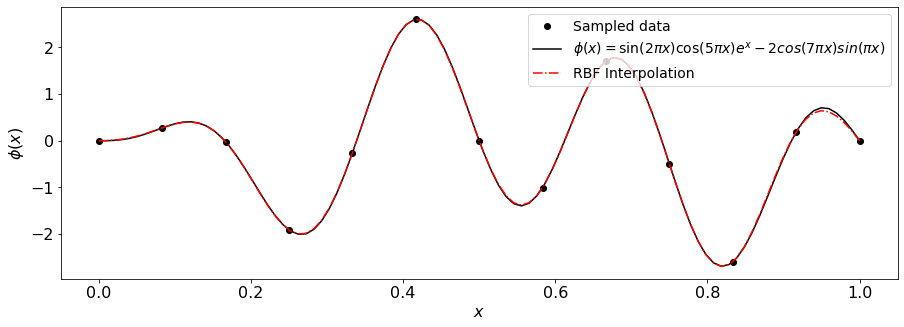

In [32]:
# Sample 10 values of X and phi.

X = np.arange(0, N + 1, 1) / N
d = phi(X)
# Gaussian length scale.
L = 1 / 9
# Calculate the kernel matrix G
G = kernel_matrix(X,  multiquadratic)

# Invert d = Gm for the model parameters.
m = rbf_model(G, d)
# Using m, interpolate phi for all values in x ∈ [0, 1].
x = np.linspace(0, 1, 100)
S = rbf_predict(x, X, m,  multiquadratic2)
# Plot the results.
plt.figure(figsize = [15, 5])
plt.plot(X, d, "ko")     # Sampled discrete data points of phi.
plt.plot(x, phi(x), "k") # True "continuous" values of phi.
plt.plot(x, S, "r-.")    # # Interpolated values of phi.
plt.legend(["Sampled data", 
            "$\phi(x) = \sin(2 \pi x) \cos(5 \pi x)e^x-2cos(7\pi x)sin(\pi x)$", 
            "RBF Interpolation"], fontsize = 14)
plt.xlabel("$x$", fontsize = 16)
plt.ylabel("$\phi(x)$", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

In [33]:
from scipy.interpolate import Rbf

In [34]:
print(len(X))
print(len(d))

13
13


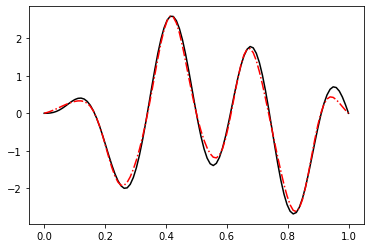

In [35]:
l_x = Rbf(X,d,function='inverse')
pred = l_x(x)
plt.plot(x, phi(x), "k")
plt.plot(x, pred, "r-.") 

In [36]:
ndim=1
M =G
temp = np.ones(N+1)
temp = np.expand_dims(temp,axis=1)
xx = np.expand_dims(X,axis=1)
M=np.concatenate([M,xx,temp],axis=1)
temp = np.concatenate([xx,temp],axis=1)
temp = np.transpose(temp)
null = np.zeros((ndim+1,ndim+1))
temp = np.concatenate([temp,null],axis=1)
M = np.concatenate([M,temp],axis=0)
temp.shape

(2, 15)

In [37]:
dd = d
for i in range(ndim+1):
  dd=np.append(dd,0)
dd.shape
abc=np.dot(np.linalg.inv(M), dd)
a = abc[:N+1]
a.shape
b = abc[N+1:N+ndim+1]
c = abc[-1]

In [38]:
c

0.3430098665972352

In [39]:
def predict(x, X, a,b,c,  f = multiquadratic2):
    S = np.array([np.dot(b,x[i])+c for i in range(len(x))])
    S=np.squeeze(S)
    for i in range(len(a)):
        S = S + a[i] * f(x, X[i])
    print(S.shape)
    return S

(100,)


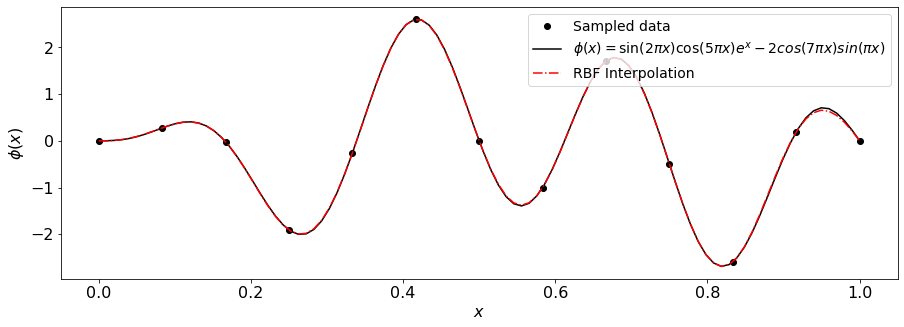

In [40]:
SS = predict(x, X, a,b,c,  multiquadratic2)
plt.figure(figsize = [15, 5])
plt.plot(X, d, "ko")     # Sampled discrete data points of phi.
plt.plot(x, phi(x), "k") # True "continuous" values of phi.
plt.plot(x, SS, "r-.")    # # Interpolated values of phi.
plt.legend(["Sampled data", 
            "$\phi(x) = \sin(2 \pi x) \cos(5 \pi x)e^x-2cos(7\pi x)sin(\pi x)$", 
            "RBF Interpolation"], fontsize = 14)
plt.xlabel("$x$", fontsize = 16)
plt.ylabel("$\phi(x)$", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()